<a href="https://colab.research.google.com/github/astrrr/quant-lab/blob/main/lab_py_fin_covariance_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

# Covariance
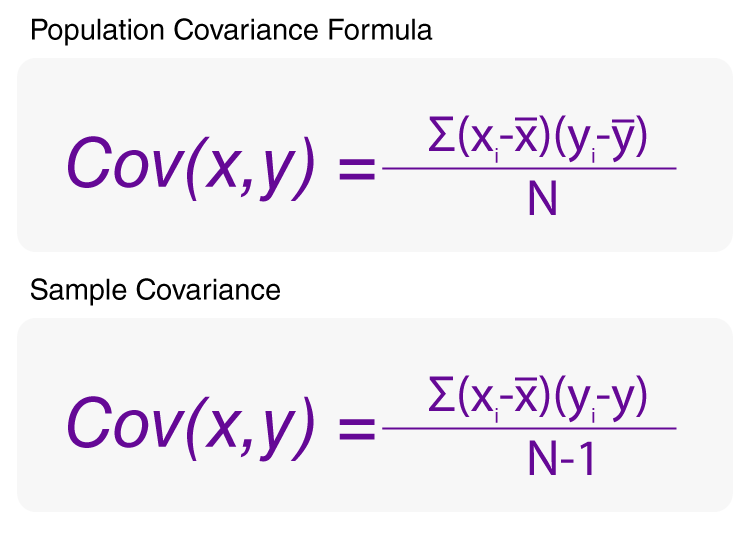

In [2]:
#mock data
study_hr = (15, 4, 12, 6, 10)
grade = (3.5, 1, 3, 2, 4)

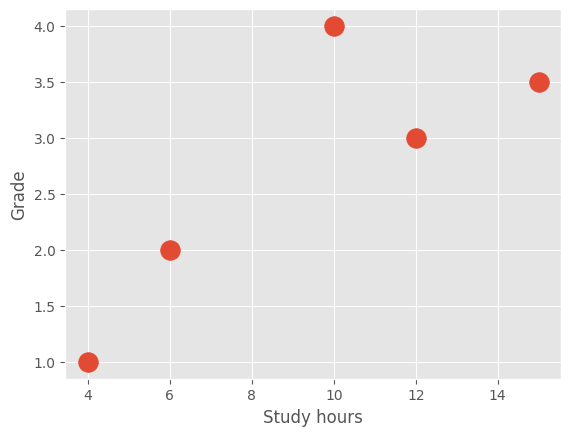

In [3]:
plt.style.use('ggplot')
plt.scatter(study_hr, grade, s=200)
plt.ylabel('Grade')
plt.xlabel('Study hours')
plt.show()

# find covariance of study hours and grade

In [4]:
np.mean(study_hr)

9.4

In [5]:
np.mean(grade)

2.7

In [6]:
#for loop
sum_cov = 0
for i in range(len(study_hr)):

  study_hr_variance = study_hr[i] - np.mean(study_hr)
  grade_variance = grade[i] - np.mean(grade)
  mul = study_hr_variance * grade_variance

  sum_cov +=mul

  print(f'round:{i+1}')
  print(f'study hours variance: {study_hr_variance:.2f}')
  print(f'grade variance:         {grade_variance:.2f}')
  print(f'mul:                        {mul:.2f}')
  print('')

print('--------------------------------------------------')
print(f'cumulative covariance: {sum_cov}')
print(f'covariance:                 {sum_cov/(len(study_hr)-1)}')


round:1
study hours variance: 5.60
grade variance:         0.80
mul:                        4.48

round:2
study hours variance: -5.40
grade variance:         -1.70
mul:                        9.18

round:3
study hours variance: 2.60
grade variance:         0.30
mul:                        0.78

round:4
study hours variance: -3.40
grade variance:         -0.70
mul:                        2.38

round:5
study hours variance: 0.60
grade variance:         1.30
mul:                        0.78

--------------------------------------------------
cumulative covariance: 17.6
covariance:                 4.4


In [7]:
#vecterization

np.sum((study_hr - np.mean(study_hr)) * (grade - np.mean(grade))) / (len(study_hr)-1)

4.4

In [8]:
#built-in np

np.cov(study_hr, grade)

array([[19.8 ,  4.4 ],
       [ 4.4 ,  1.45]])

## nagative cov

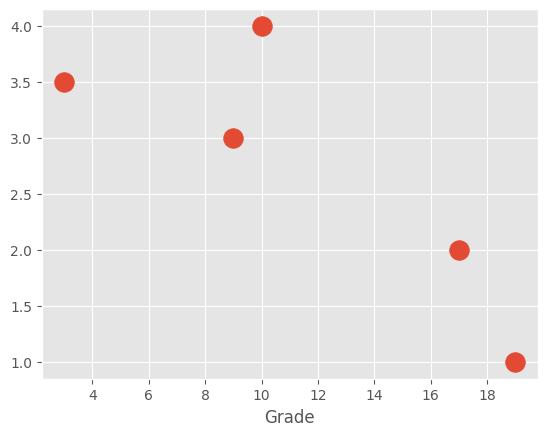

In [9]:
play_hr = (3, 19, 9, 17, 10)

plt.scatter(play_hr, grade, s=200)
plt.xlabel('Play hours')
plt.xlabel('Grade')
plt.show()

In [10]:
#for loop
sum_cov = 0
for i in range(len(play_hr)):

  play_hr_variance = play_hr[i] - np.mean(play_hr)
  grade_variance = grade[i] - np.mean(grade)
  mul = play_hr_variance * grade_variance

  sum_cov +=mul

  print(f'round:{i+1}')
  print(f'play hours variance: {play_hr_variance:.2f}')
  print(f'grade variance:         {grade_variance:.2f}')
  print(f'mul:                        {mul:.2f}')
  print('')

print('--------------------------------------------------')
print(f'cumulative covariance: {sum_cov}')
print(f'covariance:                 {sum_cov/(len(play_hr)-1)}')

round:1
play hours variance: -8.60
grade variance:         0.80
mul:                        -6.88

round:2
play hours variance: 7.40
grade variance:         -1.70
mul:                        -12.58

round:3
play hours variance: -2.60
grade variance:         0.30
mul:                        -0.78

round:4
play hours variance: 5.40
grade variance:         -0.70
mul:                        -3.78

round:5
play hours variance: -1.60
grade variance:         1.30
mul:                        -2.08

--------------------------------------------------
cumulative covariance: -26.1
covariance:                 -6.525


In [11]:
#vecterization

np.sum((play_hr - np.mean(play_hr)) * (grade - np.mean(grade))) / (len(play_hr)-1)

-6.525

In [12]:
#built-in np

np.cov(play_hr, grade)

array([[41.8  , -6.525],
       [-6.525,  1.45 ]])

# **Correlation**

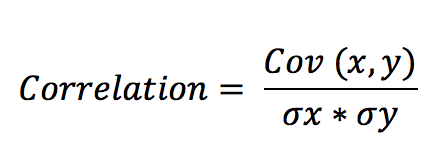

In [13]:
cov = np.cov(study_hr, grade)[0][1]
cov

4.4

In [14]:
cov/ (np.std(study_hr, ddof=1) * np.std(grade, ddof=1))

0.8211756827352529

In [15]:
#np builtin

np.corrcoef(study_hr, grade)

array([[1.        , 0.82117568],
       [0.82117568, 1.        ]])

# Real Data

In [16]:
!pip install yfinance

In [17]:
import yfinance as yf

In [18]:
df_dji = yf.download('^DJI', interval='1d', start="2023-01-01", end="2023-12-31")
df_aapl = yf.download('AAPL', interval='1d', start="2023-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [19]:
df_dji.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,37349.269531,37534.519531,37268.878906,37385.968750,37385.968750,252970000
2023-12-26,37405.898438,37617.988281,37371.828125,37545.328125,37545.328125,212420000
2023-12-27,37518.621094,37683.699219,37488.601562,37656.519531,37656.519531,245530000
2023-12-28,37661.519531,37778.851562,37650.980469,37710.101562,37710.101562,199550000
2023-12-29,37701.628906,37759.429688,37538.800781,37689.539062,37689.539062,234570000


In [20]:
df_aapl.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.580002,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.529999,42628800


In [23]:
df_dji_close = df_dji[0:-1]['Close']
df_aapl_close = df_aapl[0:-1]['Close']

covariance

In [25]:
np.cov(df_dji_close,df_aapl_close)

array([[1.33992777e+06, 1.27367067e+04],
       [1.27367067e+04, 2.99981786e+02]])

In [26]:
np.cov(df_aapl_close, df_dji_close)

array([[2.99981786e+02, 1.27367067e+04],
       [1.27367067e+04, 1.33992777e+06]])

correlation

In [27]:
np.corrcoef(df_dji_close, df_aapl_close)

array([[1.       , 0.6352856],
       [0.6352856, 1.       ]])

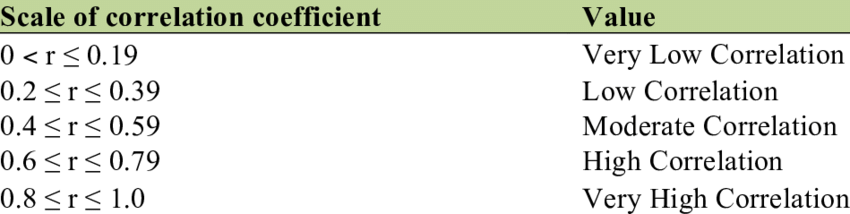

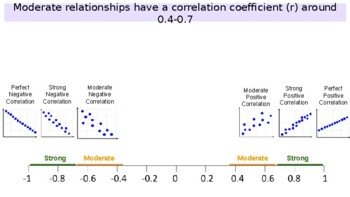

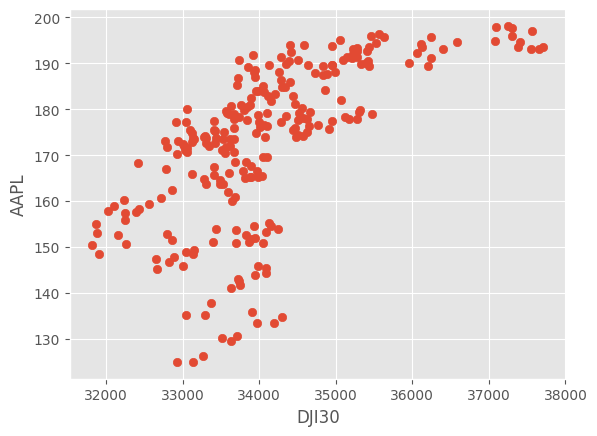

Covariance: 12736.7067
Correlation: 0.6353


In [30]:
plt.scatter(df_dji_close, df_aapl_close)
plt.xlabel("DJI30")
plt.ylabel("AAPL")
plt.show()
print(f'Covariance: {np.cov(df_dji_close, df_aapl_close)[0][1]:.4f}')
print(f'Correlation: {np.corrcoef(df_dji_close, df_aapl_close)[0][1]:.4f}')

In [32]:
df_dji_close_pct = df_dji_close.pct_change()
df_aapl_close_pct = df_aapl_close.pct_change()

df_dji_close_pct.dropna(inplace=True)
df_aapl_close_pct.dropna(inplace=True)

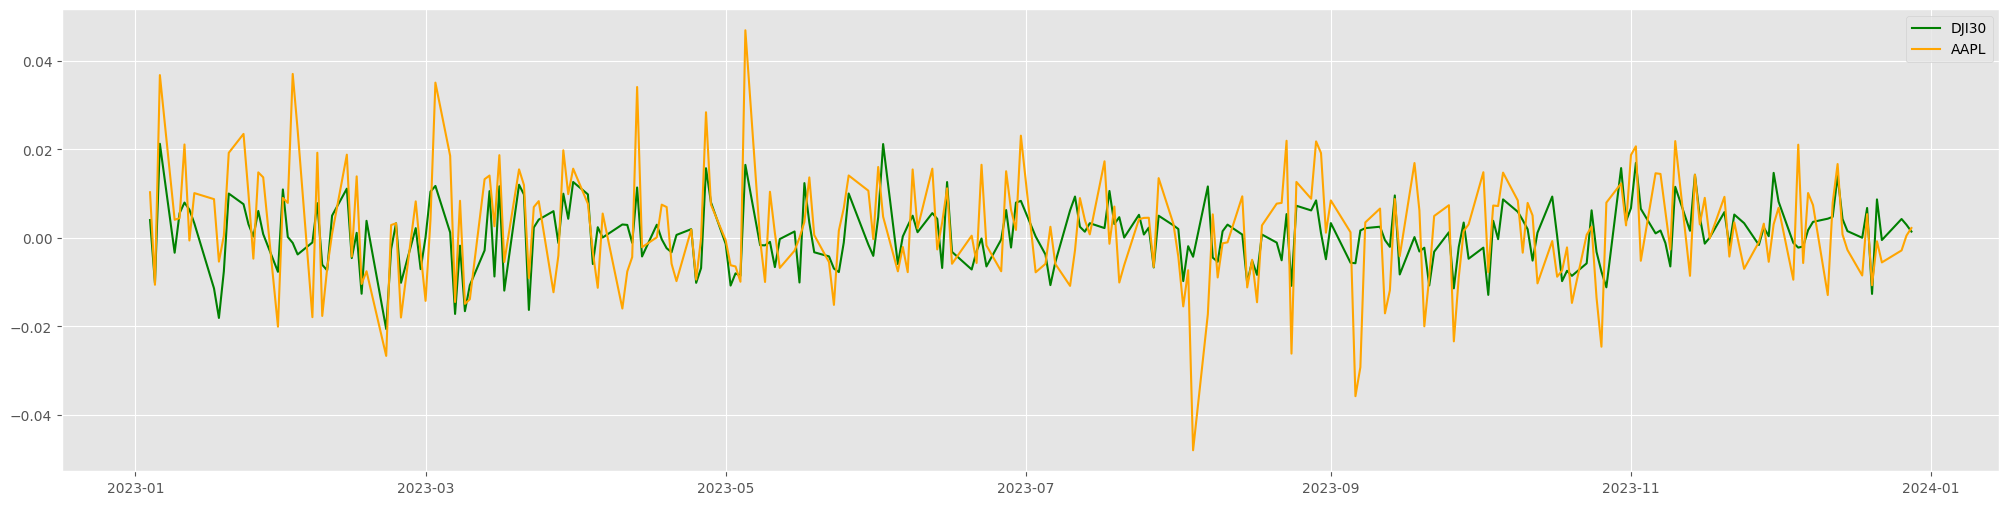

In [51]:
plt.figure(figsize=(25,6))
plt.plot(df_dji_close_pct.index, df_dji_close_pct, color="green", label="DJI30")
plt.plot(df_aapl_close_pct.index, df_aapl_close_pct, color="orange", label='AAPL')
plt.legend()
plt.show()

In [52]:
np.cov(df_dji_close_pct, df_aapl_close_pct)

array([[5.20336058e-05, 5.15477586e-05],
       [5.15477586e-05, 1.58320386e-04]])

In [53]:
np.corrcoef(df_dji_close_pct, df_aapl_close_pct)

array([[1.        , 0.56793601],
       [0.56793601, 1.        ]])

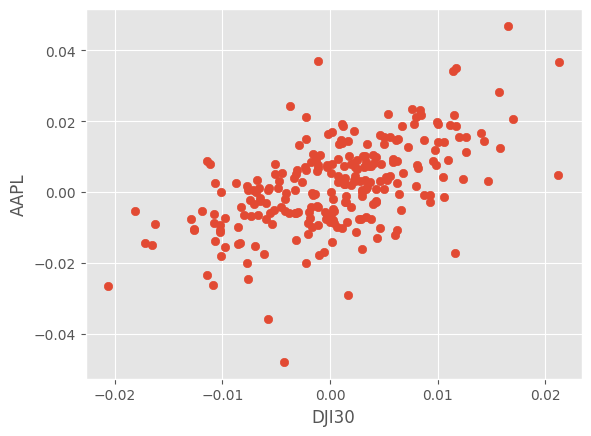

Covariance: 0.0001
Correlation: 0.5679


In [54]:
plt.scatter(df_dji_close_pct, df_aapl_close_pct)
plt.xlabel("DJI30")
plt.ylabel("AAPL")
plt.show()
print(f'Covariance: {np.cov(df_dji_close_pct, df_aapl_close_pct)[0][1]:.4f}')
print(f'Correlation: {np.corrcoef(df_dji_close_pct, df_aapl_close_pct)[0][1]:.4f}')

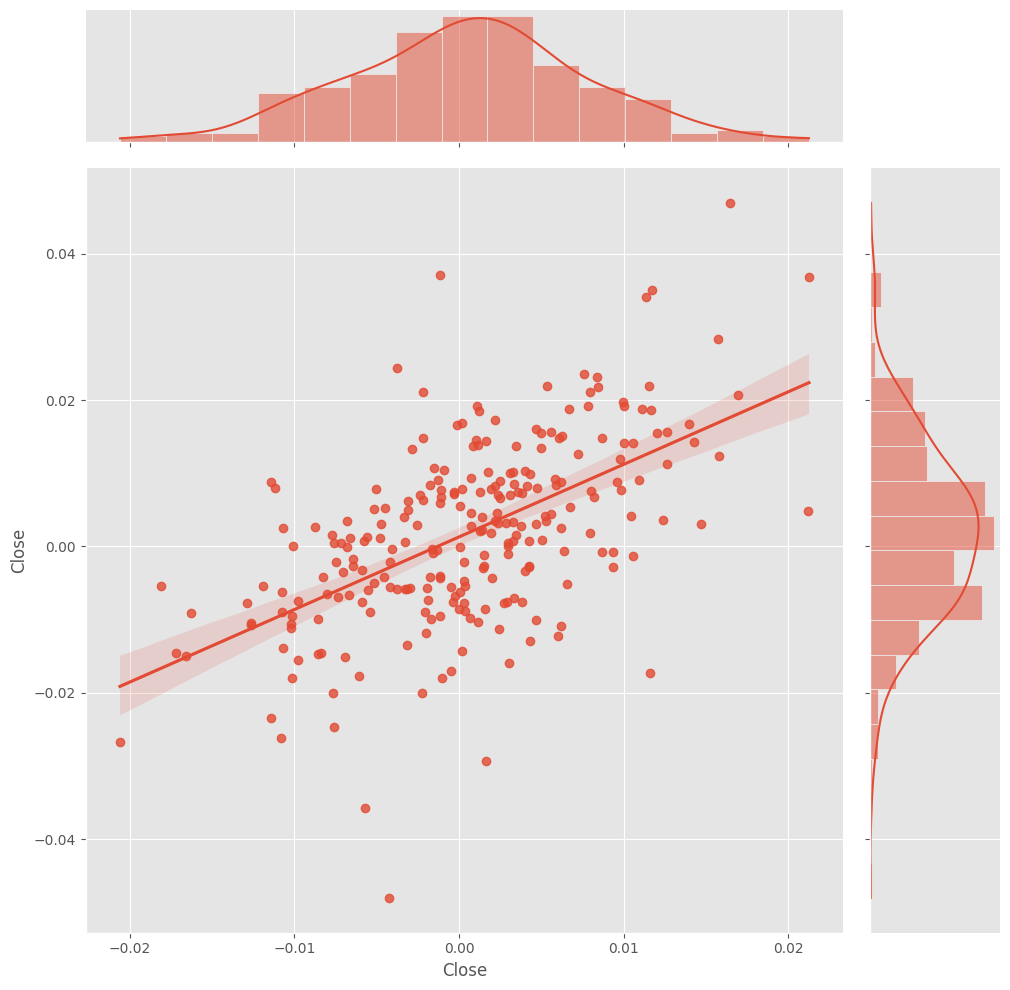

In [60]:
sns.jointplot(x=df_dji_close_pct, y=df_aapl_close_pct, kind='reg', height=10)